Import necessary libraries.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import quantfinanceHEC as qf

Get price data for dg, spy and scho, and compute excess returns.

In [62]:
start_date = "2002-01-01"
end_date = "2022-01-01"

# Get close price data for Dollar General, a SP500 ETF and a Short-Term US Treasury ETF.
dg = qf.data_fetching.f_fetch_stock_data(symbol="dg", start_date=start_date, end_date=end_date, interval="daily")["4. close"] 
spy = qf.data_fetching.f_fetch_stock_data(symbol="spy", start_date=start_date, end_date=end_date, interval="daily")["4. close"] 
scho = qf.data_fetching.f_fetch_stock_data(symbol="scho", start_date=start_date, end_date=end_date, interval="daily")["4. close"]

prices = pd.concat([dg, spy, scho], axis = 1) # Merge dataframes
prices.columns = ["dg", "spy", "scho"] # Rename columns
prices = prices.iloc[::-1] # reverse order of index

ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

In [ ]:
returns = prices.pct_change(fill_method=None) # Compute returns
returns = returns.dropna() # Drop NAs (first row)
returns["dg.excess"] = returns["dg"] - returns["scho"] # Compute daily excess returns for Apple
returns["spy.excess"] = returns["spy"] - returns["scho"] # Compute daily excess returns for SPY 

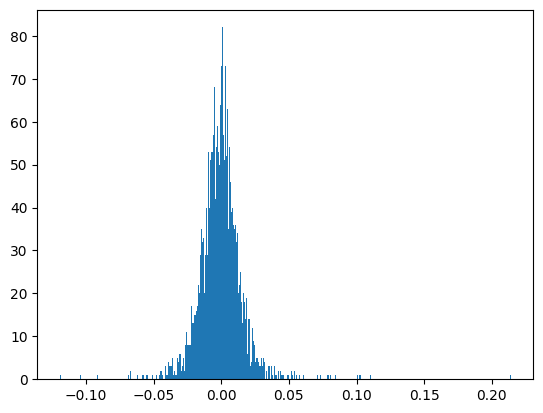

In [ ]:
plt.hist(returns["dg"], bins=500)
plt.show()

In [ ]:
trading_days = 252 # Nb trading days / year
ann_exp_return_dg = (1 + returns["dg"].mean()) ** trading_days - 1 # Annualized expected returns of dg
ann_exp_return_spy = (1 + returns["spy"].mean()) ** trading_days - 1 # Annualized expected returns of dg



-0.0006169682875084282 -0.14403345801628464


Fit Linear Regression model to excess return data.

In [ ]:
model = qf.linear_regression.f_multivariate_linear_regression(data=returns, dependent_vars=["dg.excess"], independent_vars=["spy.excess"])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dg.excess   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     473.2
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.42e-96
Time:                        11:42:56   Log-Likelihood:                 7276.8
No. Observations:                2620   AIC:                        -1.455e+04
Df Residuals:                    2618   BIC:                        -1.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.301      0.193      -0.001       0.000
spy.excess     0.5770      0.027     21.752      0.000       0.525       0.629
==============================================================================
Omnibus:                     1058.589   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53069.013
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                      24.929   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

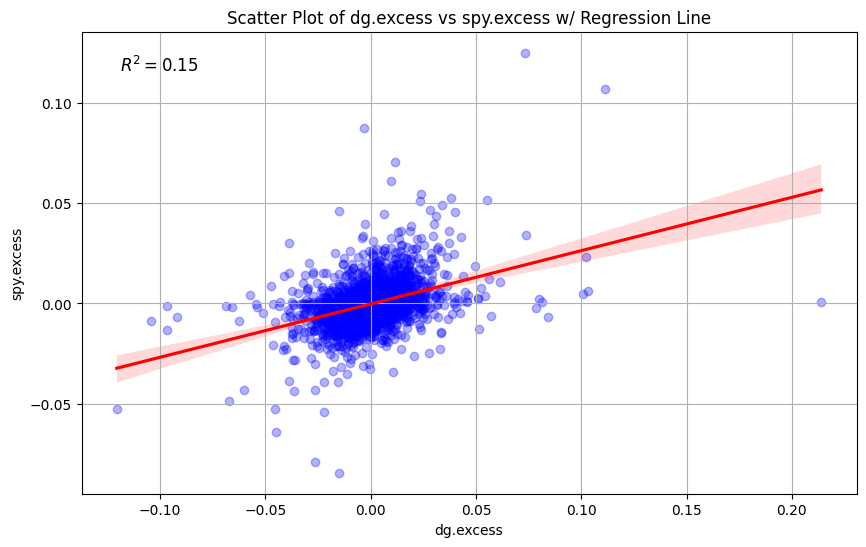

In [ ]:
import seaborn as sns

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='dg.excess', y='spy.excess', data=returns, scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot of dg.excess vs spy.excess w/ Regression Line')
plt.xlabel('dg.excess')
plt.ylabel('spy.excess')
plt.grid(True)

# Adding the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2 = {model.rsquared:.2f}$', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.show()